In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json


%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Downloaded the .csv file from the source, uploaded directly to PUIdata folder
#os.getenv(varname[, value])
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [3]:
import os
def getzip():
    os.system("mkdir " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
    os.system("mv " + "mn_mappluto_16v1.zip " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("unzip " + os.getenv("PUIDATA") + "/Manhattan/" + "mn_mappluto_16v1.zip -d " + os.getenv("PUIDATA")+"/Manhattan")
    os.system("rm " + os.getenv("PUIDATA") + "/Manhattan/mn_mappluto_16v1.zip")

In [4]:
getzip()

In [5]:
#import zipfile
#zf = zipfile.ZipFile(os.getenv("PUIDATA") +("/Manhattan") + ("/mn_mappluto_16v1 (1).zip"), 'r')
#a = zf.extractall("../Manhattan/")
#a
#zf.close()
#print(a)
#plutofile = "MNMapPLUTO.shp"
#a = zf.namelist()

#ZipFile.extractall([path[, members[, pwd]]])
#unzip = zf.extractall(("PUIDATA"))
#print(unzip)
#bsize = gp.read_file(os.getenv("PUIDATA") +("/Manhattan") + ("/mn_mappluto_16v1 (1).zip") + ()

In [6]:
#Get Pluto data, move to PUIDATA folder, and read it using Geopandas into a dataframe. 
#!curl -O "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"
#os.rename("mn_mappluto_16v1.zip", "../PUIDATA/mappluto.zip")
#plutozip="../PUIDATA/mappluto.zip"
#zf = zipfile.ZipFile(plutozip, mode='r')
#zf.extractall("../PUIDATA/")
#zf.close()
#plutofile = "MNMapPLUTO.shp"

#geopandas reader resource: http://geopandas.org/io.html
#bsize = gpd.read_file(os.getenv('PUI2016') + '_bja282/PUIDATA/' + plutofile) 

In [7]:
#plutofile = "MNMapPLUTO.shp"
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")
#bsize = gp.read_file(os.getenv("PUIDATA") + ("/Manhattan"))

In [8]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [9]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f271b680a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f275a0d20d0>]], dtype=object)

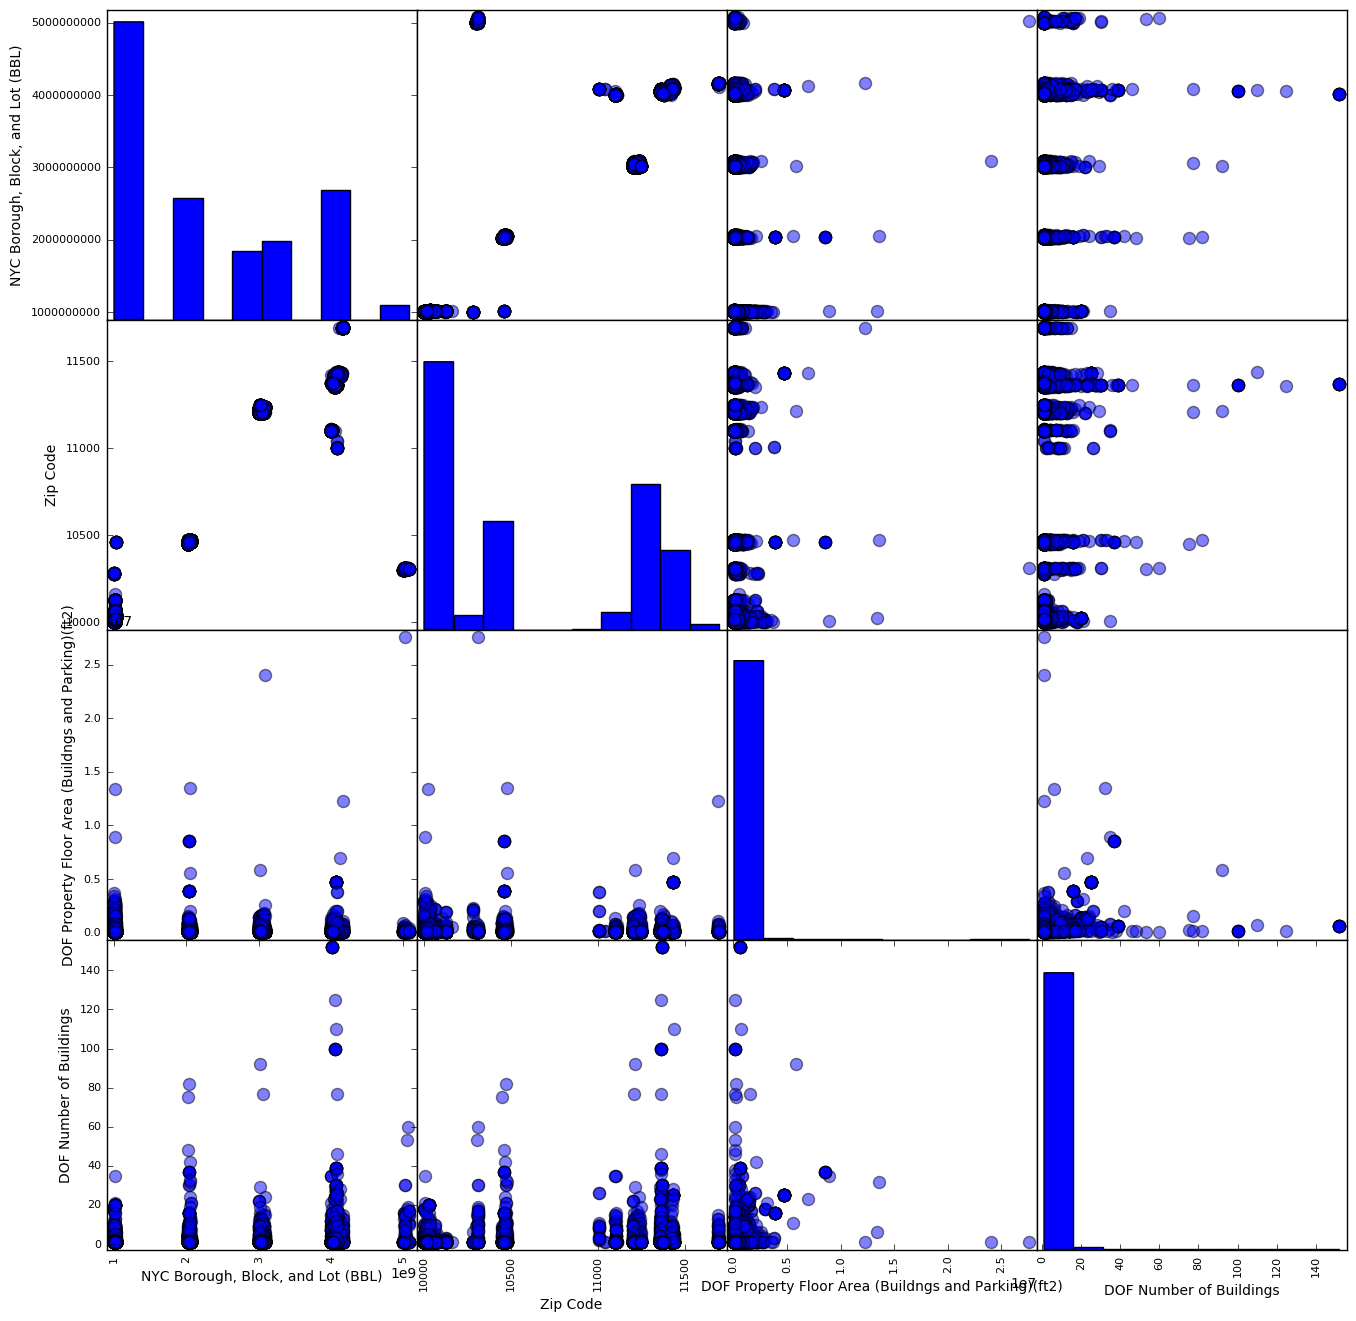

In [10]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [11]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [12]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
indx = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')
#do it for however many columns you need

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)

In [15]:
#set invalid parts to NAN using pd.to.numeric with coerce
#http://stackoverflow.com/questions/34844711/convert-entire-pandas-dataframe-to-integers-in-pandas-0-17-0
df = pd.DataFrame({'ints': ['nrg', 'bsize']})
df.apply(pd.to_numeric, errors='coerce').info()
df.head()

nrg["Site EUI(kBtu/ft2)"] = pd.to_numeric(nrg["Site EUI(kBtu/ft2)"], errors="coerce")
nrg["Reported Property Floor Area (Building(s)) (ft²)"] = pd.to_numeric(nrg["Reported Property Floor Area (Building(s)) (ft²)"], errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
ints    0 non-null float64
dtypes: float64(1)
memory usage: 88.0 bytes


In [16]:
##check that your conversion worked: e.g.
print (nrg['Site EUI(kBtu/ft2)'].astype(float)) #Float Conversion tests 
print (nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float))
bsize.BBL.astype(float)

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64
Record Number
12086    918919.

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [17]:
#Rename Data Sets for merge
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace=True)
nrg.rename(columns={'Site EUI(kBtu/ft2)': 'EUI'}, inplace=True)
#nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)
#nrg

In [18]:
nrg.drop(nrg.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23]], axis=1, inplace=True)
nrg.columns

Index([u'BBL', u'EUI', u'Reported Property Floor Area (Building(s)) (ft²)'], dtype='object')

In [19]:
bsizeclean = bsize[[u'BBL',u'UnitsRes', u'UnitsTotal', u'ZoneMap', u'geometry']]
bsizeclean.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal', u'ZoneMap', u'geometry'], dtype='object')

In [22]:
import sys  

#Had an issue with unicode ascii
#Source: http://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte
#reload(sys)  
sys.setdefaultencoding('utf8')

bblnrg = pd.merge(nrg, bsizeclean, how='inner', on=["BBL"])# left_on=None, right_on=None,
         #left_index=False, right_index=False, sort=True,)
bblnrg

,BBL,EUI,Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,ZoneMap,geometry
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,..."
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,..."
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,..."
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,..."
5,1.012770e+09,NaN,66546.0,0,16,8d,"POLYGON ((989816.6493999958 213852.891200006, ..."
6,1.008830e+09,NaN,58456.0,2,3,8d,"POLYGON ((989130.5303999931 209596.8801999986,..."
7,1.002830e+09,NaN,NaN,0,1,12d,"POLYGON ((986850.9712000042 199193.8816000074,..."
8,1.008210e+09,NaN,73000.0,0,13,8d,"POLYGON ((986205.1560000032 209039.4704000056,..."
9,1.008240e+09,NaN,74027.0,0,11,8d,"POLYGON ((986845.4065999985 209434.6395999938,..."


In [23]:
from pandas.tools.plotting import scatter_matrix
import sys  

#Had an issue with unicode ascii
#Source: http://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte
reload(sys)  
sys.setdefaultencoding('utf8')

# Now the scatter matrix plot should show more columns.
#scatter_matrix(bblnrg, alpha=0.2, figsize=(16, 16))
#scatter_matrix (bblnrg, alpha=0.2, s=30, figsize=(16, 16))

#as3:/usr/local/lib/python2.7/site-packages# cat sitecustomize.py
# encoding=utf8  

In [24]:
#Rename Data Sets for merge
nrg.rename(columns={"Reported Property Floor Area (Building(s)) (ft²)": 'bldgsqft'}, inplace=True)
#two = nrg.rename(columns={'Site EUI(kBtu/ft2)': 'E/area'}, inplace=True)
#nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)



#nrg.rename(columns={"Site EUI(kBtu/ft2)":"Sqenergy"
                           #,"Reported Property Floor Area (Building(s)) (ft²)":"Sqarea"}, inplace=True)

# Use lambda for multiplication to find total energy use
bblnrg["Total_Energy_Usage"] = nrg.apply(lambda x : float(x.bldgsqft) * float(x.EUI), axis=1)
bblnrg

,BBL,EUI,Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,ZoneMap,geometry,Total_Energy_Usage
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,...",NaN
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,...",224620062.5
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,...",179961000.0
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,...",20100639.5
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,...",66947940.0
5,1.012770e+09,NaN,66546.0,0,16,8d,"POLYGON ((989816.6493999958 213852.891200006, ...",39382917.0
6,1.008830e+09,NaN,58456.0,2,3,8d,"POLYGON ((989130.5303999931 209596.8801999986,...",127595358.8
7,1.002830e+09,NaN,NaN,0,1,12d,"POLYGON ((986850.9712000042 199193.8816000074,...",43003391.0
8,1.008210e+09,NaN,73000.0,0,13,8d,"POLYGON ((986205.1560000032 209039.4704000056,...",35639028.0
9,1.008240e+09,NaN,74027.0,0,11,8d,"POLYGON ((986845.4065999985 209434.6395999938,...",5300918.0


In [25]:
#removing rows with null values
bblnrg = bblnrg[~bblnrg.Total_Energy_Usage.isnull()]

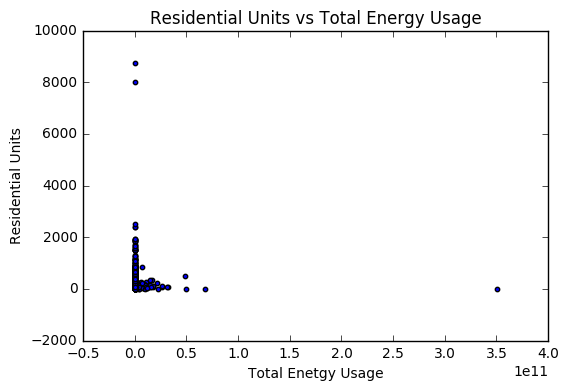

<function matplotlib.pyplot.text>

In [26]:
ax = bblnrg.plot.scatter(y="UnitsRes", x="Total_Energy_Usage", s=10)
ax.set_xlabel("Total Enetgy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Residential Units vs Total Energy Usage")
pl.show()
pyplot.text

<function matplotlib.pyplot.show>

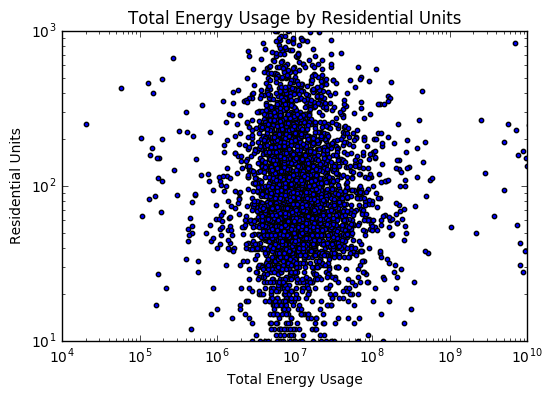

In [27]:
ax = bblnrg.plot.scatter(y="UnitsRes", x="Total_Energy_Usage", s=10, loglog=True)
ax.set_ylim(10, 1000)
ax.set_xlim(1e4, 1e10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Total Energy Usage by Residential Units")
pl.show



#fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
#fig = plt.figure()
#text = text.acs

#matplotlib.figure.Figure.text()

In [30]:
# Adding the fit line, using code from skeleton notebook 

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = sm.add_constant(np.log10(bblnrg.UnitsRes))
model = sm.OLS(np.log10(bblnrg.Total_Energy_Usage), X, missing='drop') 
fit_1 = model.fit()
Y = fit_1.predict()
y = np.log10(bblnrg.Total_Energy_Usage)
sigma = y/2 
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure Result {}".format(chisq))

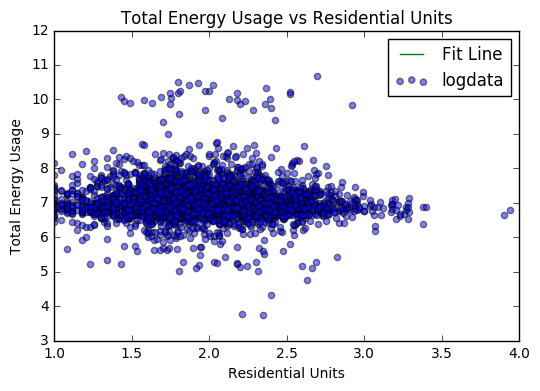

In [32]:
pl.scatter(log10(bblnrg.UnitsRes), log10(bblnrg.Total_Energy_Usage), alpha=0.5, label="logdata")
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_1.predict(x_fit), 'g-', label="Fit Line")
pl.plot()
pl.ylabel("Total Energy Usage")
pl.xlabel("Residential Units")
pl.title("Total Energy Usage vs Residential Units")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()

In [33]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Energy_Usage   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Oct 2016   Prob (F-statistic):                nan
Time:                        00:42:48   Log-Likelihood:                    nan
No. Observations:                5753   AIC:                               nan
Df Residuals:                    5753   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const             nan        nan        nan        nan           nan       nan
UnitsRes          nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = sm.add_constant(np.log10(bblnrg.Total_Energy_Usage))
model = sm.OLS(np.log10(bblnrg.UnitsRes), X, missing='drop') 
fit_2 = model.fit()
Y = fit_2.predict()
y = np.log10(bblnrg.UnitsRes)
sigma = y/2
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure Result {}".format(chisq))

In [ ]:
pl.scatter(log10(bblnrg.Total_Energy_Usage), log10(bblnrg.UnitsRes), alpha=0.5, label="logdata")
x_line = np.linspace(5,9,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_2.predict(x_fit), 'g-', label="Fit Line")
pl.plot()
pl.ylabel("Residential Units")
pl.xlabel("Total Energy Usage")
pl.title("Residential Units vs Total Energy Usage")
pl.legend(loc="upper left")
plt.xlim(5,9)
pl.show()

In [ ]:
fit_2.summary()

In [ ]:
#Creating new dataframe for the 2nd degree polynomial fit line
degree_2 = bblnrg[["UnitsRes","Total_Energy_Usage"]]
degree_2 = degree_2.applymap(np.log10)

In [ ]:
degree_2.head()

In [ ]:
#Creating the column for the 2nd degree polynomial
degree_2["Degree2"] = degree_2.UnitsRes**2

In [ ]:
degree_2.head()

In [ ]:
Test_2 = smf.ols(formula = 'Total_Energy_Usage ~ Degree2 + UnitsRes', data=degree_2).fit()
Test_2.summary()

In [ ]:
pl.scatter(log10(bblnrg.UnitsRes), log10(bblnrg.Total_Energy_Usage), alpha=0.5, label="logdata")
dfnew = pd.DataFrame()
dfnew['UnitsRes'] = np.arange(log10(bblnrg.UnitsRes).min(), log10(bblnrg.UnitsRes).max(), 0.1)
dfnew['Degree2'] = dfnew['UnitsRes'] * dfnew['UnitsRes']
pl.plot(dfnew['UnitsRes'], fres.predict(dfnew), 'g-', label="Fit Line Curve")
pl.plot()
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_1.predict(x_fit), 'y-', label="Fit Line Stright")
pl.ylabel("Total Energy Usage")
pl.xlabel("Residential Units")
pl.title("Total Energy Usage vs Residential Units")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()

In [ ]:
#Likelihood Ratio (LR) = -2 * (Log-Likelihood_Model1 - Log-Likelihood_Model2)
#Log-Likelihood_Model1 = -1522.2
#Log-Likelihood_Model1 = -1504.3

LR = -2*((-1522.2) - (-1504.3))
LR

In [ ]:
smf.ols(formula = 'Total_Energy_Usage ~ Degree2 + UnitsRes', 
        data=degree_2).fit().compare_lr_test(smf.ols(formula = 'Total_Energy_Usage ~  UnitsRes', 
        data=degree_2).fit())